K-Means Clustering

In [ ]:
#Çok fazla sayıdaki ham veriyi gruplamra yırmak için kullanılır.
#unsupervised learing modeller grubuna girer.
#K = küme sayısı
#K adet centrpoid (merkez) belirlenir.
#Her nokta en yakın merkeze atanır.
#Merkezler güncellenir.
#Yukarıdaki iki adım K küme merkezi sabit kalana kadar tekrarlanır.
#Kümeleme sonuçları değerlendirilir.
#K değeri nasıl belirlenir?
#Elbow Method (Dirsek Yöntemi) k değerleri distortion değerleri ile birlikte grafiğe döküldüğünüzde dirsek noktasının k değeri olarak seçilmesi. ve o k optimal k değeridir.
#Silhouette Skoru: Farklı K değerleri için silhouette skoru hesaplanır ve en yüksek skora sahip K değeri seçilir.
#Avantajları:
#Basit ve hızlıdır.
#Büyük veri setlerinde etkilidir.
#Dezavantajları:
#K değeri önceden belirlenmelidir.
#Küme şekilleri küresel olmalıdır.
#Küçük kümeler büyük kümeler tarafından etkilenebilir.
#K-means++: Başlangıç merkezlerinin daha akıllı seçilmesi için kullanılır.

AVM yönetimi müşterilerde bulunan AVM kartlarına sayesnde müşterilerine ait bazı bilgileri kaydetmiştir ancak henüz herhangibir gruplama yapmamıştır.

Projemizde bu müşteriler için gruplama yapacağız.

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #veri ölçeklendirme
import matplotlib.pyplot as plt

df=pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


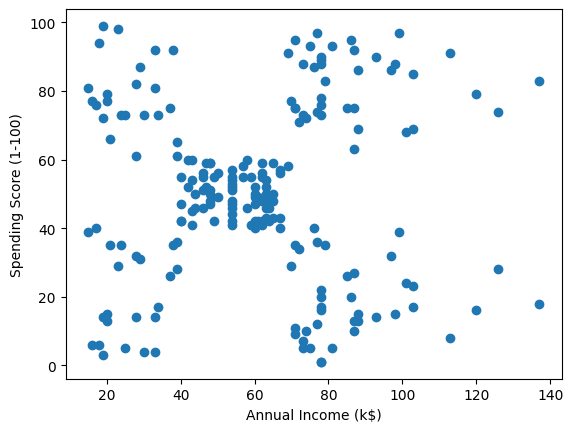

In [2]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

#veri setimize bir göz atalım:

In [3]:
#Bazı sütun isimleri çok uzun onları kısaltalım:
df.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},inplace=True)

Unutmayın modelinize verileri basmadan önce mutlaka verilerinizi normalize etmelisiniz!

In [4]:
#Geçen dersimizde normalizasyonu biz yapmıştık bu defer sklearn kütüphamesindeki MinMaxScaler ile yapalım:
#MinMaxScaler() fonksiyonu kullanıcağız:

scaler=MinMaxScaler()

scaler.fit(df[["Income"]]) 
df[["Income"]] = scaler.transform(df[["Income"]])

scaler.fit(df[["Score"]])
df[["Score"]] = scaler.transform(df[["Score"]])

df.head()

,CustomerID,Income,Score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


In [5]:
df.tail()

,CustomerID,Income,Score
195,196,0.860656,0.795918
196,197,0.909836,0.275510
197,198,0.909836,0.744898
198,199,1.000000,0.173469
199,200,1.000000,0.836735


Önce K değerini belirleyelim (Elbow Yönemi kullanarak)

In [6]:
k_range=range(1,11)

list_dist=[]

for k in k_range:
    kmeans_modelim=KMeans(n_clusters=k)
    kmeans_modelim.fit(df[['Income','Score']])
    list_dist.append(kmeans_modelim.inertia_) #inertia her k değeri için distortion değerini verir.

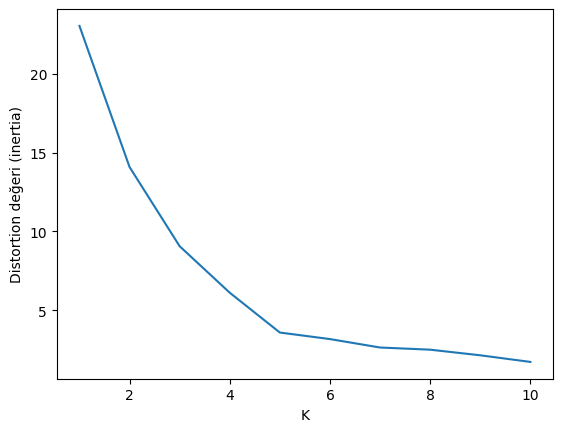

In [7]:
plt.xlabel('K')
plt.ylabel('Distortion değeri (inertia)')
plt.plot(k_range,list_dist)
plt.show()

En iyi K değeri =5

In [8]:
#K=5 için bir K-Means modeli oluşturalım:
kmeans_modelim= KMeans(n_clusters=5)
y_predicted=kmeans_modelim.fit_predict(df[['Income','Score']])
y_predicted

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 0,
       2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [9]:
df['cluster']=y_predicted
df.head()

,CustomerID,Income,Score,cluster
0,1,0.000000,0.387755,2
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,2
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,2


In [10]:
#Centroidleri bir görelim:
kmeans_modelim.cluster_centers_

array([[0.32866853, 0.49340468],
       [0.58638083, 0.82783883],
       [0.08792846, 0.19619666],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894]])

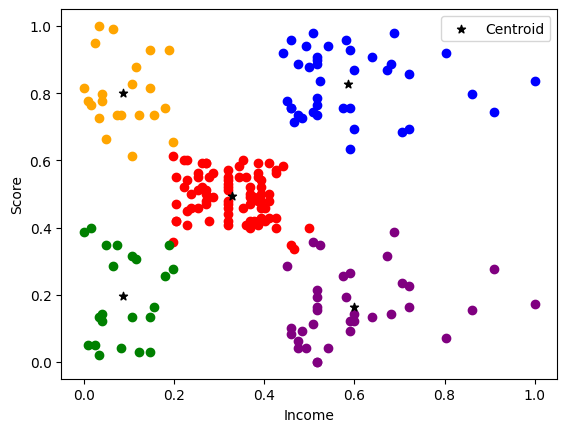

In [11]:
df1=df[df.cluster==0] #pandas filtreleme yöntemi
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.xlabel('Income')
plt.ylabel('Score')
plt.scatter(df1['Income'],df1['Score'],color='red')
plt.scatter(df2['Income'],df2['Score'],color='blue')
plt.scatter(df3['Income'],df3['Score'],color='green')
plt.scatter(df4['Income'],df4['Score'],color='purple')
plt.scatter(df5['Income'],df5['Score'],color='orange')

#kmeans_modelim.cluster_centers_ numpy 2 boyutlu array olduğu için x ve y sütun
#ve kmeans_modelim.cluster_centers_[:,1] şeklinde scatter plot için alıyoruz:
plt.scatter(kmeans_modelim.cluster_centers_[:,0],kmeans_modelim.cluster_centers_[:,1],color='black',marker='*',label='Centroid')
plt.legend()
plt.show()